In [1]:
import pandas as pd
import numpy as np
from numpy.random import randn

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from xgboost import XGBClassifier
from xgboost import plot_importance
from xgboost import plot_importance
from lightgbm import LGBMClassifier
import xgboost as xgb
from lightgbm import plot_importance

from scipy.stats import chi2_contingency
import scipy.stats as stats 
from scipy.stats import ttest_ind
from scipy.stats import f_oneway
from statsmodels.formula.api import ols
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.api import qqplot, add_constant
from statsmodels.api import Logit
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.stats.proportion import proportions_ztest

import lightgbm as lgb
from subprocess import call
from IPython.display import Image
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from yellowbrick.cluster import SilhouetteVisualizer

import graphviz
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.linear_model import LogisticRegression
from sklearn.tree import export_graphviz
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.cluster import AgglomerativeClustering, KMeans, DBSCAN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.feature_selection import RFE
from sklearn.feature_selection import chi2
from sklearn.inspection import permutation_importance

from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, LabelEncoder
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, f1_score, confusion_matrix, classification_report
from sklearn.metrics import roc_curve, auc, make_scorer
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

from imblearn.over_sampling import SMOTE

from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

import warnings
warnings.filterwarnings('ignore')

matplotlib.rc('font', family = 'NanumBarunGothic')
matplotlib.rc('axes', unicode_minus = False)

In [2]:
df_merged = pd.read_csv("/home/piai/merged_with_2.csv", encoding = 'euc-kr')

In [3]:
filtered_df = df_merged[df_merged['wafer_defect'] == 1 ]
# 타겟 변수의 평균 계산
mean_target = filtered_df['Target'].mean()

print("wafer_defect가 1인 값들 중 Target의 평균:", mean_target)

filtered_df = df_merged[df_merged['wafer_defect'] == 0 ]
# 타겟 변수의 평균 계산
mean_target = filtered_df['Target'].mean()

print("wafer_defect가 0인 값들 중 Target의 평균:", mean_target)

wafer_defect가 1인 값들 중 Target의 평균: 261.4901610017889
wafer_defect가 0인 값들 중 Target의 평균: 90.67173486547085


In [4]:
df_merged.shape

(15390, 56)

In [5]:
df_merged['Ox_Chamber'] = df_merged['Ox_Chamber'].astype(str)
df_merged['Lot_Num'] = df_merged['Lot_Num'].astype(str)
df_merged['Wafer_Num'] = df_merged['Wafer_Num'].astype(str)

df_merged['photo_soft_Chamber'] = df_merged['photo_soft_Chamber'].astype(str)

df_merged['lithography_Chamber'] = df_merged['lithography_Chamber'].astype(str)
df_merged['Wavelength'] = df_merged['Wavelength'].astype(str)

df_merged['Etching_Chamber'] = df_merged['Etching_Chamber'].astype(str)

# Flux480s, Flux840s, RTA_Temp 이산형 확인 .astype('category')
df_merged['Chamber_Num'] = df_merged['Chamber_Num'].astype(str)

df_merged['wafer_defect'] = df_merged['wafer_defect'].astype('category')
df_merged['Line_CD_state'] = df_merged['Line_CD_state'].astype('category')
df_merged['thickness_state'] = df_merged['thickness_state'].astype('category')

In [6]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15390 entries, 0 to 15389
Data columns (total 56 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   Ox_Chamber           15390 non-null  object  
 1   type                 15390 non-null  object  
 2   Temp_OXid            15390 non-null  float64 
 3   Vapor                15390 non-null  object  
 4   ppm                  15390 non-null  float64 
 5   Pressure             15390 non-null  float64 
 6   Oxid_time            15390 non-null  float64 
 7   thickness            15390 non-null  float64 
 8   Lot_Num              15390 non-null  object  
 9   Wafer_Num            15390 non-null  object  
 10  photo_soft_Chamber   15390 non-null  object  
 11  resist_target        15390 non-null  float64 
 12  N2_HMDS              15390 non-null  float64 
 13  pressure_HMDS        15390 non-null  float64 
 14  temp_HMDS            15390 non-null  float64 
 15  temp_HMDS_bake     

In [7]:
df_merged.drop(columns=['ppm','resist_target_state' ,'Line_CD_state', 'thickness_state', 'Defective_Rate_chip', 'path','Error_message',\
                        'Target', 'Lot_Num', 'Wafer_Num', 'Ox_Chamber', 'photo_soft_Chamber', 'lithography_Chamber',\
                        'Etching_Chamber', 'Chamber_Num', 'merged_Chamber', 'DayOfWeek'], inplace=True)

In [8]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15390 entries, 0 to 15389
Data columns (total 39 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   type               15390 non-null  object  
 1   Temp_OXid          15390 non-null  float64 
 2   Vapor              15390 non-null  object  
 3   Pressure           15390 non-null  float64 
 4   Oxid_time          15390 non-null  float64 
 5   thickness          15390 non-null  float64 
 6   resist_target      15390 non-null  float64 
 7   N2_HMDS            15390 non-null  float64 
 8   pressure_HMDS      15390 non-null  float64 
 9   temp_HMDS          15390 non-null  float64 
 10  temp_HMDS_bake     15390 non-null  float64 
 11  time_HMDS_bake     15390 non-null  float64 
 12  spin1              15390 non-null  float64 
 13  spin2              15390 non-null  float64 
 14  spin3              15390 non-null  float64 
 15  photoresist_bake   15390 non-null  float64 
 16  temp

In [9]:
# # 데이터프레임 정의
# df_char = df_merged.select_dtypes(include="object")
# df_numeric = df_merged.select_dtypes(exclude="object")

# # 타겟 변수와 설명 변수 정의
# df_y = df_numeric['wafer_defect']
# df_x = df_numeric.drop(columns=['wafer_defect'])

# # 숫자형 데이터 표준화
# scaler = StandardScaler()
# np_numeric_scaled = scaler.fit_transform(df_x)
# df_numeric_scaled = pd.DataFrame(np_numeric_scaled, columns=df_x.columns, index=df_x.index)

# # 범주형 데이터 원-핫 인코딩
# df_encoded = pd.get_dummies(df_char)

# # 최종 데이터프레임 생성
# df_x = df_numeric_scaled.join(df_encoded)

# # 데이터 분할
# X_train, X_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.3, random_state=1234)

# # 타겟 변수 인코딩
# le_target = LabelEncoder()
# y_train_encoded = le_target.fit_transform(y_train)
# y_test_encoded = le_target.transform(y_test)

# # 모델 학습
# model = LogisticRegression(max_iter=1000, random_state=1234)  # 로지스틱 회귀 모델
# model.fit(X_train, y_train_encoded)

# # 예측
# y_pred_encoded = model.predict(X_test)

# # 평가
# accuracy = accuracy_score(y_test_encoded, y_pred_encoded)
# target_names = [str(cls) for cls in le_target.classes_]  # 클래스 레이블 문자열로 변환
# classification_rep = classification_report(y_test_encoded, y_pred_encoded, target_names=target_names)

# print("Accuracy:", accuracy)
# print("Classification Report:\n", classification_rep)

# # 로지스틱 회귀는 피처 중요도 시각화 대신 계수 시각화를 사용할 수 있습니다.
# coefficients = model.coef_.flatten()
# importance_df = pd.DataFrame({
#     'Feature': X_train.columns,
#     'Coefficient': coefficients
# })

# # 계수 기준으로 정렬
# importance_df = importance_df.sort_values(by='Coefficient', ascending=False)

# # 피처 계수 출력
# print("\nFeature Coefficients:\n", importance_df)

# # 피처 계수 시각화
# plt.figure(figsize=(10, 8))
# plt.barh(importance_df['Feature'], importance_df['Coefficient'], color='skyblue')
# plt.xlabel('Coefficient')
# plt.title('Feature Coefficients')
# plt.gca().invert_yaxis()
# plt.show()

# # 로지스틱 회귀 모델의 결정 경계 시각화는 가능하지만,
# # 이는 이진 분류 문제에서 주로 적용됩니다.
# # 여러 클래스의 경우, 다차원 시각화 기법이 필요할 수 있습니다.

Accuracy: 0.9867879575481915
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      4270
           1       0.90      0.93      0.91       347

    accuracy                           0.99      4617
   macro avg       0.95      0.96      0.95      4617
weighted avg       0.99      0.99      0.99      4617


Feature Importances:
               Feature  Importance
0           Temp_OXid    0.226691
19            Thin F4    0.209639
21            Thin F2    0.100331
17         Resolution    0.071918
10              spin1    0.059294
27            Flux90s    0.057503
18    Energy_Exposure    0.056361
31  Temp_implantation    0.038050
30       input_Energy    0.026478
22            Thin F1    0.024332
11              spin2    0.024220
3           thickness    0.021571
26            Flux60s    0.016419
20            Thin F3    0.013598
8      temp_HMDS_bake    0.011554
2           Oxid_time    0.010471
14      temp_softba

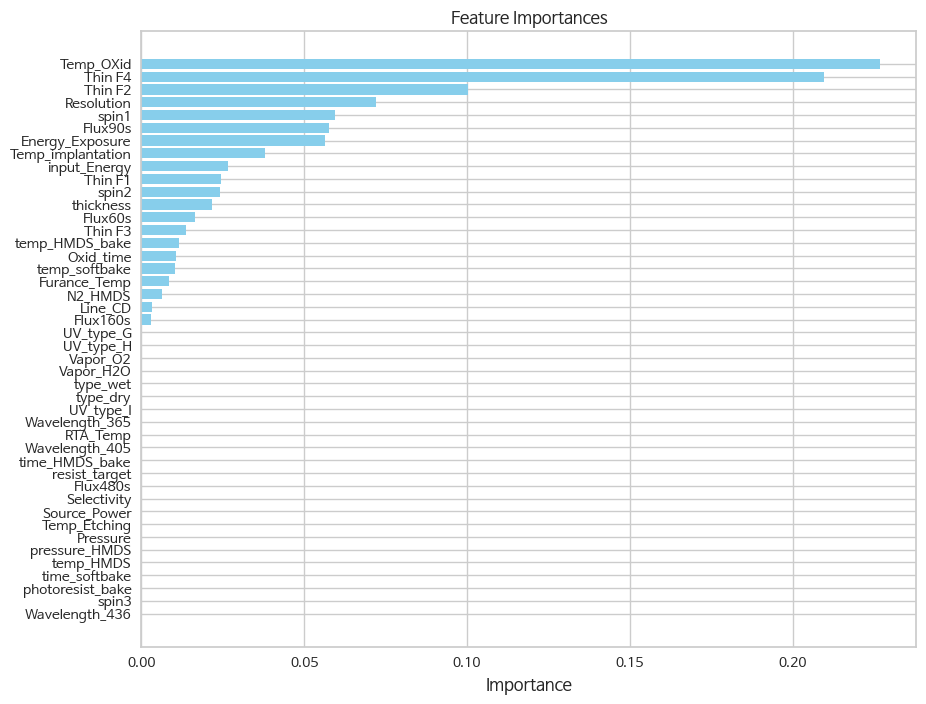

In [10]:
# 데이터프레임 정의
df_char = df_merged.select_dtypes(include="object")
df_numeric = df_merged.select_dtypes(exclude="object")

# 타겟 변수와 설명 변수 정의
df_y = df_numeric['wafer_defect']
df_x = df_numeric.drop(columns=['wafer_defect'])

# 범주형 데이터 원-핫 인코딩
df_encoded = pd.get_dummies(df_char)

# 최종 데이터프레임 생성
df_x = df_x.join(df_encoded)

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.3, random_state=1234)

# 모델 학습
model = DecisionTreeClassifier(random_state = 1234, max_depth = 8)
model.fit(X_train, y_train)

# 예측
y_pred = model.predict(X_test)

# 평가
accuracy = accuracy_score(y_test, y_pred)
target_names = [str(cls) for cls in y_test.unique()]  # 클래스 레이블 문자열로 변환
classification_rep = classification_report(y_test, y_pred, target_names=target_names)

print("Accuracy:", accuracy)
print("Classification Report:\n", classification_rep)

# 피처 중요도 추출
feature_importances = model.feature_importances_

# 피처 이름
feature_names = X_train.columns

# 중요도와 피처 이름을 데이터프레임으로 변환
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
})

# 중요도 기준으로 정렬
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# 피처 중요도 출력
print("\nFeature Importances:\n", importance_df)

# 피처 중요도 시각화
plt.figure(figsize=(10, 8))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.title('Feature Importances')
plt.gca().invert_yaxis()
plt.show()

# # 의사결정 트리 시각화
# dot_data = export_graphviz(model, out_file=None, 
#                            feature_names=X_train.columns,
#                            class_names=class_names,
#              df_x              filled=True, rounded=True, special_characters=True)  

# # Graphviz 객체 생성
# graph = graphviz.Source(dot_data)  

# # PDF로 저장
# graph.render("decision_tree", format='pdf')

# # PDF 파일 보기 (옵션)
# graph.view("decision_tree")

Accuracy: 0.9844054580896686
Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99      4270
           1       1.00      0.79      0.88       347

    accuracy                           0.98      4617
   macro avg       0.99      0.90      0.94      4617
weighted avg       0.98      0.98      0.98      4617


Feature Importances:
               Feature  Importance
19            Thin F4    0.140409
21            Thin F2    0.099030
0           Temp_OXid    0.066672
20            Thin F3    0.053355
27            Flux90s    0.053350
28           Flux160s    0.041863
2           Oxid_time    0.036090
16            Line_CD    0.034920
3           thickness    0.034773
14      temp_softbake    0.033514
30       input_Energy    0.033366
12              spin3    0.032990
10              spin1    0.030561
17         Resolution    0.027645
31  Temp_implantation    0.026152
18    Energy_Exposure    0.025138
11              spi

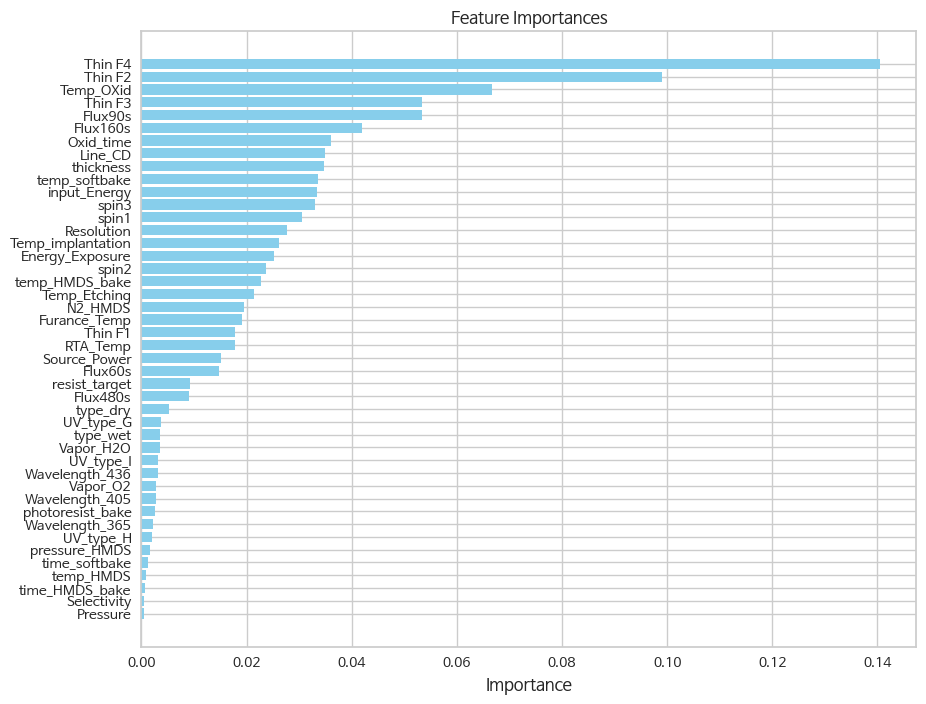

In [11]:
# 랜덤 포레스트 모델 학습
rf_model = RandomForestClassifier(max_depth = 8)
rf_model.fit(X_train, y_train)

# 예측
y_pred = rf_model.predict(X_test)

# 평가
accuracy = accuracy_score(y_test, y_pred)
target_names = [str(cls) for cls in y_test.unique()]  # 클래스 레이블 문자열로 변환
classification_rep = classification_report(y_test, y_pred, target_names=target_names)

print("Accuracy:", accuracy)
print("Classification Report:\n", classification_rep)

# 피처 중요도 추출
feature_importances = rf_model.feature_importances_

# 피처 이름
feature_names = X_train.columns

# 중요도와 피처 이름을 데이터프레임으로 변환
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
})

# 중요도 기준으로 정렬
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# 피처 중요도 출력
print("\nFeature Importances:\n", importance_df)

# 피처 중요도 시각화
plt.figure(figsize=(10, 8))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.title('Feature Importances')
plt.gca().invert_yaxis()
plt.show()

Accuracy: 0.9885206844271172
Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99      4270
           1       0.98      0.86      0.92       347

    accuracy                           0.99      4617
   macro avg       0.99      0.93      0.96      4617
weighted avg       0.99      0.99      0.99      4617


Feature Importances:
               Feature  Importance
0           Temp_OXid    0.273564
19            Thin F4    0.242529
21            Thin F2    0.122672
28           Flux160s    0.064026
27            Flux90s    0.056247
17         Resolution    0.040067
30       input_Energy    0.036414
3           thickness    0.035243
20            Thin F3    0.031173
31  Temp_implantation    0.020103
18    Energy_Exposure    0.011330
2           Oxid_time    0.010879
8      temp_HMDS_bake    0.009753
16            Line_CD    0.007817
26            Flux60s    0.007764
12              spin3    0.006696
10              spi

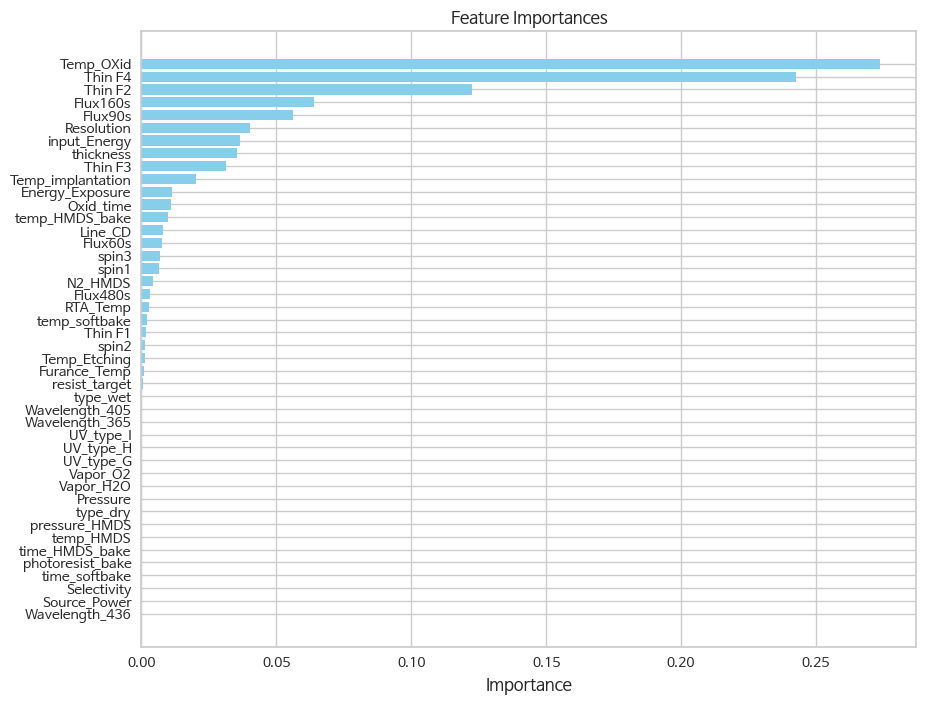

In [12]:
# Gradient Boosting 모델 학습
gbm_model = GradientBoostingClassifier(random_state=1234, max_depth = 2, min_samples_split = 100, \
                                       n_estimators=180)
gbm_model.fit(X_train, y_train)

# 예측
y_pred = gbm_model.predict(X_test)

# 평가
accuracy = accuracy_score(y_test, y_pred)
target_names = [str(cls) for cls in y_test.unique()]  # 클래스 레이블 문자열로 변환
classification_rep = classification_report(y_test, y_pred, target_names=target_names)

print("Accuracy:", accuracy)
print("Classification Report:\n", classification_rep)

# 피처 중요도 추출
feature_importances = gbm_model.feature_importances_

# 피처 이름
feature_names = X_train.columns

# 중요도와 피처 이름을 데이터프레임으로 변환
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
})

# 중요도 기준으로 정렬
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# 피처 중요도 출력
print("\nFeature Importances:\n", importance_df)

# 피처 중요도 시각화
plt.figure(figsize=(10, 8))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.title('Feature Importances')
plt.gca().invert_yaxis()
plt.show()

Accuracy: 0.9885206844271172
Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99      4270
           1       0.98      0.86      0.92       347

    accuracy                           0.99      4617
   macro avg       0.99      0.93      0.96      4617
weighted avg       0.99      0.99      0.99      4617


Feature Importances:
               Feature  Importance
0           Temp_OXid    0.143768
19            Thin F4    0.085031
21            Thin F2    0.083189
3           thickness    0.048380
8      temp_HMDS_bake    0.045758
18    Energy_Exposure    0.044386
20            Thin F3    0.043567
28           Flux160s    0.043483
33           RTA_Temp    0.041824
17         Resolution    0.039596
4       resist_target    0.036037
27            Flux90s    0.035970
39          UV_type_H    0.032182
16            Line_CD    0.029277
30       input_Energy    0.026144
32       Furance_Temp    0.025459
24       Source_Pow

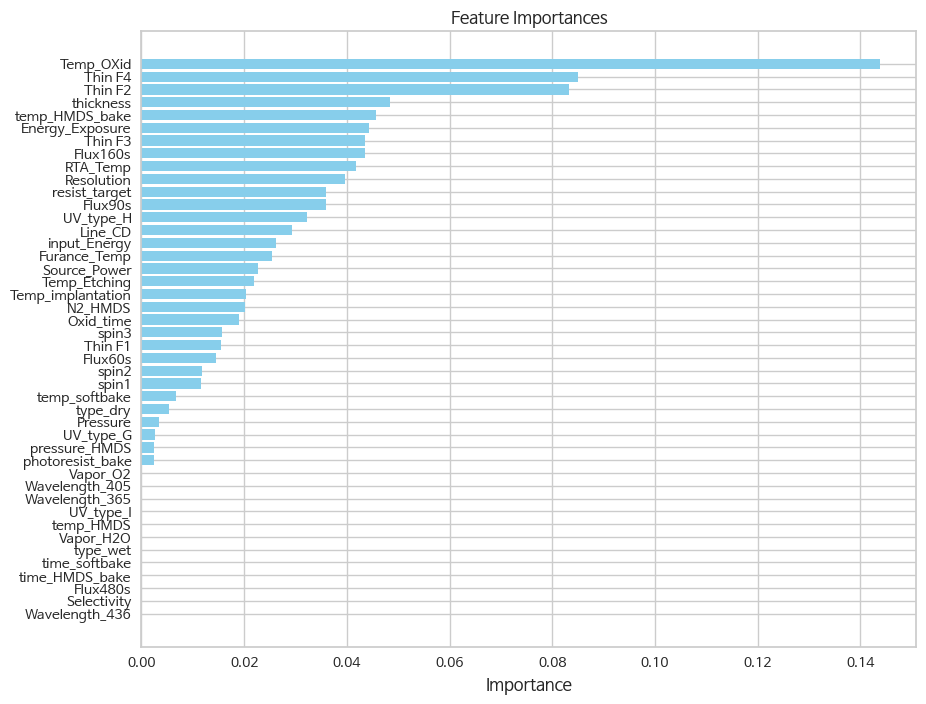

In [13]:
# XGBoost 모델 학습
xgb_model = xgb.XGBClassifier(random_state=1234, max_depth = 2, n_estimators=220)
xgb_model.fit(X_train, y_train)

# 예측
y_pred1 = xgb_model.predict(X_test)

# 평가
accuracy = accuracy_score(y_test, y_pred)
target_names = [str(cls) for cls in y_test.unique()]  # 클래스 레이블 문자열로 변환
classification_rep = classification_report(y_test, y_pred, target_names=target_names)

print("Accuracy:", accuracy)
print("Classification Report:\n", classification_rep)

# 피처 중요도 추출
feature_importances = xgb_model.feature_importances_

# 피처 이름
feature_names = X_train.columns

# 중요도와 피처 이름을 데이터프레임으로 변환
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
})

# 중요도 기준으로 정렬
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# 피처 중요도 출력
print("\nFeature Importances:\n", importance_df)

# 피처 중요도 시각화
plt.figure(figsize=(10, 8))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.title('Feature Importances')
plt.gca().invert_yaxis()
plt.show()

Accuracy: 0.9885206844271172
Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99      4270
           1       0.98      0.86      0.92       347

    accuracy                           0.99      4617
   macro avg       0.99      0.93      0.96      4617
weighted avg       0.99      0.99      0.99      4617


Feature Importances:
               Feature  Importance
19            Thin F4          90
21            Thin F2          83
30       input_Energy          56
17         Resolution          43
28           Flux160s          36
0           Temp_OXid          34
27            Flux90s          33
5             N2_HMDS          32
20            Thin F3          31
3           thickness          30
11              spin2          23
18    Energy_Exposure          20
26            Flux60s          19
32       Furance_Temp          18
16            Line_CD          17
10              spin1          16
31  Temp_implantati

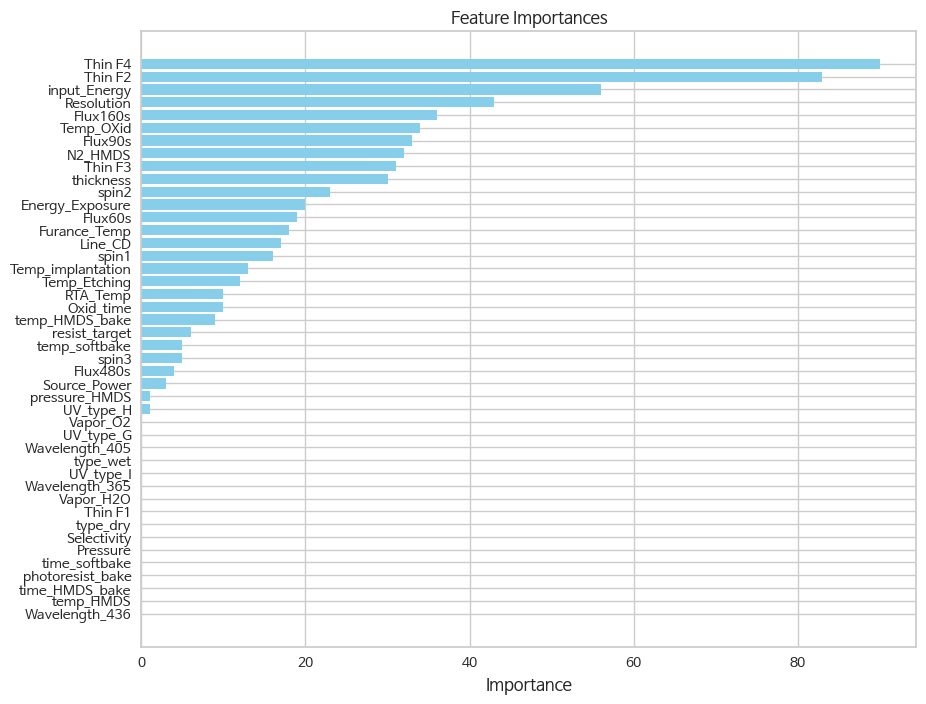

In [14]:
# LightGBM 모델 학습
lgb_model = lgb.LGBMClassifier(random_state=1234, max_depth = 2, n_estimators=220)
lgb_model.fit(X_train, y_train)

# 예측
y_pred_encoded = lgb_model.predict(X_test)

# 평가
accuracy = accuracy_score(y_test, y_pred)
target_names = [str(cls) for cls in y_test.unique()]  # 클래스 레이블 문자열로 변환
classification_rep = classification_report(y_test, y_pred, target_names=target_names)

print("Accuracy:", accuracy)
print("Classification Report:\n", classification_rep)

# 피처 중요도 추출
feature_importances = lgb_model.feature_importances_

# 피처 이름
feature_names = X_train.columns

# 중요도와 피처 이름을 데이터프레임으로 변환
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
})

# 중요도 기준으로 정렬
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# 피처 중요도 출력
print("\nFeature Importances:\n", importance_df)

# 피처 중요도 시각화
plt.figure(figsize=(10, 8))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.title('Feature Importances')
plt.gca().invert_yaxis()
plt.show()

In [15]:
# df_merged.columns
# df_merged['Temp_OXid'] = 1120
# df_merged['N2_HMDS'] = 15.7
# df_merged['RTA_Temp'] = 154
# df_merged['Flux90s'] = 100000000000000000
# df_merged['Flux480s'] = 300000000000000000
# df_merged['input_Energy'] = 31900
# df_merged['Temp_Etching'] = 67.91

df_merged['Temp_OXid'] = np.random.uniform(low=1120, high=1348.62, size=len(df_merged))
df_merged['N2_HMDS'] = np.random.uniform(low=9.28, high=15.7, size=len(df_merged))
df_merged['RTA_Temp'] = np.random.uniform(low=37, high=50, size=len(df_merged))
df_merged['Flux90s'] = np.random.uniform(low=3840000000, high=100000000000000000, size=len(df_merged))
df_merged['Flux480s'] = np.random.uniform(low=1000000000000000, high=300000000000000000, size=len(df_merged))
df_merged['input_Energy'] = np.random.uniform(low=29604, high=31900, size=len(df_merged))
df_merged['Temp_Etching'] = np.random.uniform(low=67.91, high=71, size=len(df_merged))

# 데이터프레임 정의
df_char = df_merged.select_dtypes(include="object")
df_numeric = df_merged.select_dtypes(exclude="object")

# 타겟 변수와 설명 변수 정의
df_y = df_numeric['wafer_defect']
df_x = df_numeric.drop(columns=['wafer_defect'])

# 범주형 데이터 원-핫 인코딩
df_encoded = pd.get_dummies(df_char)

# 최종 데이터프레임 생성
df_x = df_x.join(df_encoded)

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.3, random_state=1234)

In [16]:
y_pred2 = xgb_model.predict(X_test)

# 평가
accuracy = accuracy_score(y_test, y_pred)
target_names = [str(cls) for cls in y_test.unique()]  # 클래스 레이블 문자열로 변환
classification_rep = classification_report(y_test, y_pred, target_names=target_names)

print("Accuracy:", accuracy)
print("Classification Report:\n", classification_rep)

Mean Squared Error: 0.03508771929824561
Mean Absolute Error: 0.03508771929824561
R^2 Score: 0.49520210030438216


In [17]:
len(y_pred1)

4617

In [18]:
len(y_pred2)

4617

In [19]:
y_pred1.sum()

347

In [20]:
y_pred2.sum()

191

In [21]:
# 예측 결과를 DataFrame으로 변환
y_pred1_df = pd.DataFrame(y_pred1, columns=['Predicted1'])
y_pred2_df = pd.DataFrame(y_pred2, columns=['Predicted2'])

# X_test가 numpy 배열인 경우
if isinstance(X_test, np.ndarray):
    X_test_df = pd.DataFrame(X_test)
else:
    X_test_df = X_test.copy()

# y_test가 numpy 배열인 경우
if isinstance(y_test, np.ndarray):
    y_test_series = pd.Series(y_test, name='Actual')
else:
    y_test_series = y_test.copy()

# X_test와 y_pred를 concat
result_df = pd.concat([X_test_df.reset_index(drop=True), y_pred1_df.reset_index(drop=True)], axis=1)

# 예측 결과와 실제 값을 결합
result_df = pd.concat([result_df.reset_index(drop=True), y_pred2_df.reset_index(drop=True)], axis=1)

print(result_df.head())

result_df.to_csv('최적운전.csv', index=False)

     Temp_OXid  Pressure  Oxid_time  thickness  resist_target    N2_HMDS  \
0  1282.305007      0.12      195.0     688.38          0.901  12.463408   
1  1163.098090      0.10       45.0     712.24          1.454  12.438582   
2  1249.832831      0.30      230.0     719.90          0.996  12.518394   
3  1208.349269      0.21       68.0     693.57          0.871  12.029416   
4  1146.015261      0.14       19.0     714.99          0.497  11.897046   

   pressure_HMDS  temp_HMDS  temp_HMDS_bake  time_HMDS_bake  ...  Vapor_H2O  \
0         14.874     19.956         205.120          90.082  ...          0   
1         14.896     19.754         199.397          90.031  ...          0   
2         15.246     20.024         199.012          90.002  ...          0   
3         14.916     20.089         204.315          89.927  ...          1   
4         15.041     20.047         203.461          89.956  ...          1   

   Vapor_O2  UV_type_G  UV_type_H  UV_type_I  Wavelength_365  Wavele

In [22]:
df_merged = pd.read_csv("/home/piai/merged_with_2.csv", encoding = 'euc-kr')

df_merged['Ox_Chamber'] = df_merged['Ox_Chamber'].astype(str)
df_merged['Lot_Num'] = df_merged['Lot_Num'].astype(str)
df_merged['Wafer_Num'] = df_merged['Wafer_Num'].astype(str)

df_merged['photo_soft_Chamber'] = df_merged['photo_soft_Chamber'].astype(str)

df_merged['lithography_Chamber'] = df_merged['lithography_Chamber'].astype(str)
df_merged['Wavelength'] = df_merged['Wavelength'].astype(str)

df_merged['Etching_Chamber'] = df_merged['Etching_Chamber'].astype(str)

# Flux480s, Flux840s, RTA_Temp 이산형 확인 .astype('category')
df_merged['Chamber_Num'] = df_merged['Chamber_Num'].astype(str)

df_merged['wafer_defect'] = df_merged['wafer_defect'].astype('category')
df_merged['Line_CD_state'] = df_merged['Line_CD_state'].astype('category')
df_merged['thickness_state'] = df_merged['thickness_state'].astype('category')

df_merged.drop(columns=['ppm','resist_target_state' ,'Line_CD_state', 'thickness_state', 'Defective_Rate_chip', 'path','Error_message',\
                        'wafer_defect', 'Lot_Num', 'Wafer_Num', 'Ox_Chamber', 'photo_soft_Chamber', 'lithography_Chamber',\
                        'Etching_Chamber', 'Chamber_Num', 'merged_Chamber', 'DayOfWeek'], inplace=True)

In [23]:
# 데이터프레임 정의
df_char = df_merged.select_dtypes(include="object")
df_numeric = df_merged.select_dtypes(exclude="object")

# 타겟 변수와 설명 변수 정의
df_y = df_numeric['Target']
df_x = df_numeric.drop(columns=['Target'])

# 범주형 데이터 원-핫 인코딩
df_encoded = pd.get_dummies(df_char)

# 최종 데이터프레임 생성
df_x = df_x.join(df_encoded)

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.3, random_state=1234)

Mean Squared Error: 620.890125589452
Mean Absolute Error: 16.814590002852366
R^2 Score: 0.8564723955560876

Feature Importances:
               Feature    Importance
19            Thin F4  3.737910e-01
21            Thin F2  3.011687e-01
0           Temp_OXid  1.013460e-01
18    Energy_Exposure  2.864586e-02
20            Thin F3  2.331057e-02
10              spin1  2.258021e-02
41     Wavelength_365  1.896881e-02
32       Furance_Temp  1.486852e-02
14      temp_softbake  1.184135e-02
22            Thin F1  1.170256e-02
5             N2_HMDS  1.090795e-02
12              spin3  1.047379e-02
30       input_Energy  9.811159e-03
35           type_wet  9.603048e-03
17         Resolution  8.242915e-03
26            Flux60s  6.325646e-03
31  Temp_implantation  6.136778e-03
27            Flux90s  5.723235e-03
16            Line_CD  4.945015e-03
2           Oxid_time  3.773839e-03
24       Source_Power  2.720064e-03
3           thickness  2.671009e-03
4       resist_target  2.302030e-03
8     

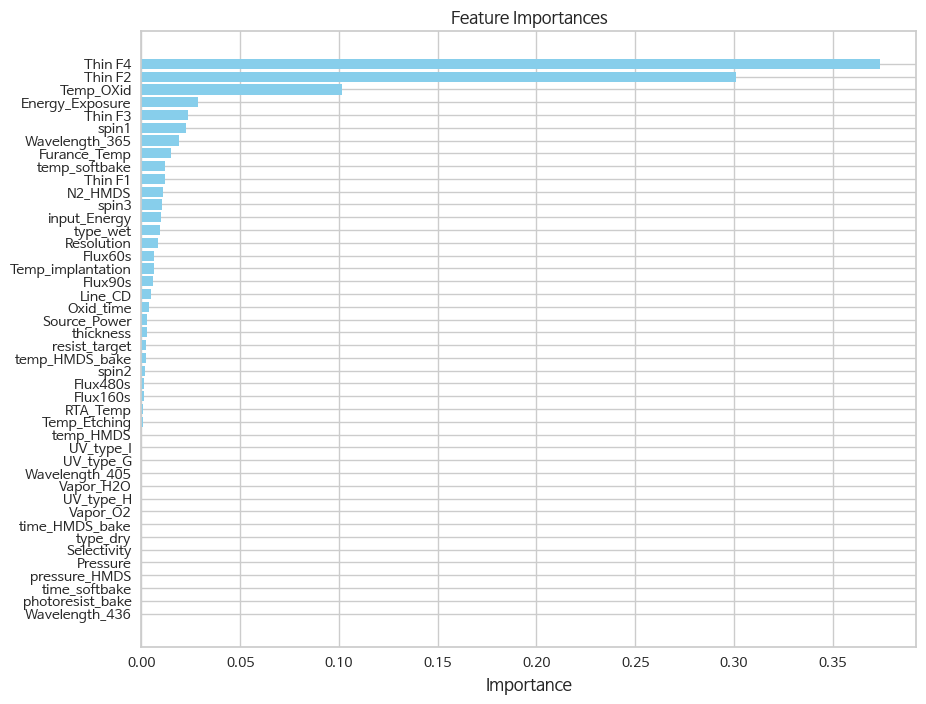

In [24]:
# 모델 학습
model = DecisionTreeRegressor(random_state=1234, max_depth=8)
model.fit(X_train, y_train)

# 예측
y_pred = model.predict(X_test)

# 평가
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R^2 Score:", r2)

# 피처 중요도 추출
feature_importances = model.feature_importances_

# 피처 이름
feature_names = X_train.columns

# 중요도와 피처 이름을 데이터프레임으로 변환
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
})

# 중요도 기준으로 정렬
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# 피처 중요도 출력
print("\nFeature Importances:\n", importance_df)

# 피처 중요도 시각화
plt.figure(figsize=(10, 8))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.title('Feature Importances')
plt.gca().invert_yaxis()
plt.show()

Mean Squared Error: 426.30385296211773
Mean Absolute Error: 14.01223939793815
R^2 Score: 0.9014537866538394

Feature Importances:
               Feature  Importance
19            Thin F4    0.369016
21            Thin F2    0.297505
0           Temp_OXid    0.090868
20            Thin F3    0.027612
12              spin3    0.019326
30       input_Energy    0.018879
32       Furance_Temp    0.014771
18    Energy_Exposure    0.014024
3           thickness    0.013858
27            Flux90s    0.012813
10              spin1    0.012194
16            Line_CD    0.011960
17         Resolution    0.011247
31  Temp_implantation    0.009791
22            Thin F1    0.008755
5             N2_HMDS    0.008457
28           Flux160s    0.007234
26            Flux60s    0.006950
2           Oxid_time    0.005783
8      temp_HMDS_bake    0.005411
14      temp_softbake    0.005212
11              spin2    0.004496
23       Temp_Etching    0.004046
40          UV_type_I    0.003789
33           RTA_Te

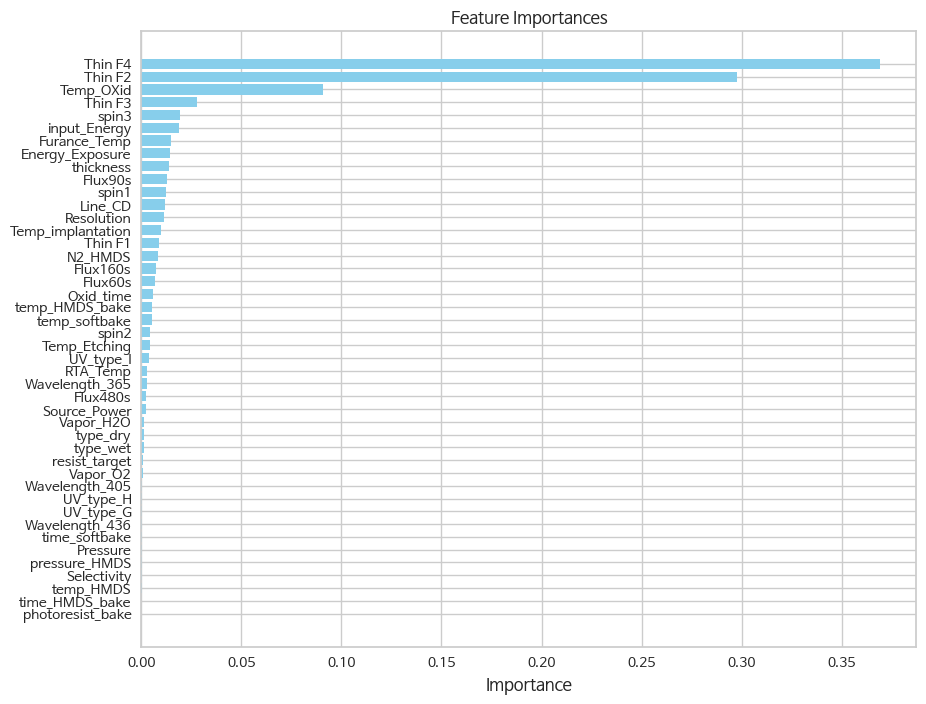

In [25]:
# 모델 학습
rf_model = RandomForestRegressor(random_state=1234, n_estimators=100, max_depth=8)
rf_model.fit(X_train, y_train)

# 예측y_test
y_pred1 = rf_model.predict(X_test)

# 평가
mse = mean_squared_error(y_test, y_pred1)
mae = mean_absolute_error(y_test, y_pred1)
r2 = r2_score(y_test, y_pred1)

print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R^2 Score:", r2)

# 피처 중요도 추출
feature_importances = rf_model.feature_importances_

# 피처 이름
feature_names = X_train.columns

# 중요도와 피처 이름을 데이터프레임으로 변환
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
})

# 중요도 기준으로 정렬
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# 피처 중요도 출력
print("\nFeature Importances:\n", importance_df)

# 피처 중요도 시각화
plt.figure(figsize=(10, 8))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.title('Feature Importances')
plt.gca().invert_yaxis()
plt.show()

Mean Squared Error: 489.52182833890987
Mean Absolute Error: 15.671982614265863
R-squared Score: 0.886840050358692

Feature Importances:
               Feature  Importance
19            Thin F4    0.328570
21            Thin F2    0.313646
0           Temp_OXid    0.092739
20            Thin F3    0.055452
27            Flux90s    0.042969
3           thickness    0.023855
12              spin3    0.019261
30       input_Energy    0.018296
18    Energy_Exposure    0.013050
16            Line_CD    0.011275
17         Resolution    0.010322
33           RTA_Temp    0.008921
2           Oxid_time    0.007218
28           Flux160s    0.006616
31  Temp_implantation    0.005638
5             N2_HMDS    0.005320
26            Flux60s    0.005211
32       Furance_Temp    0.004972
22            Thin F1    0.004721
8      temp_HMDS_bake    0.004069
23       Temp_Etching    0.003687
14      temp_softbake    0.003484
24       Source_Power    0.003329
29           Flux480s    0.002812
10           

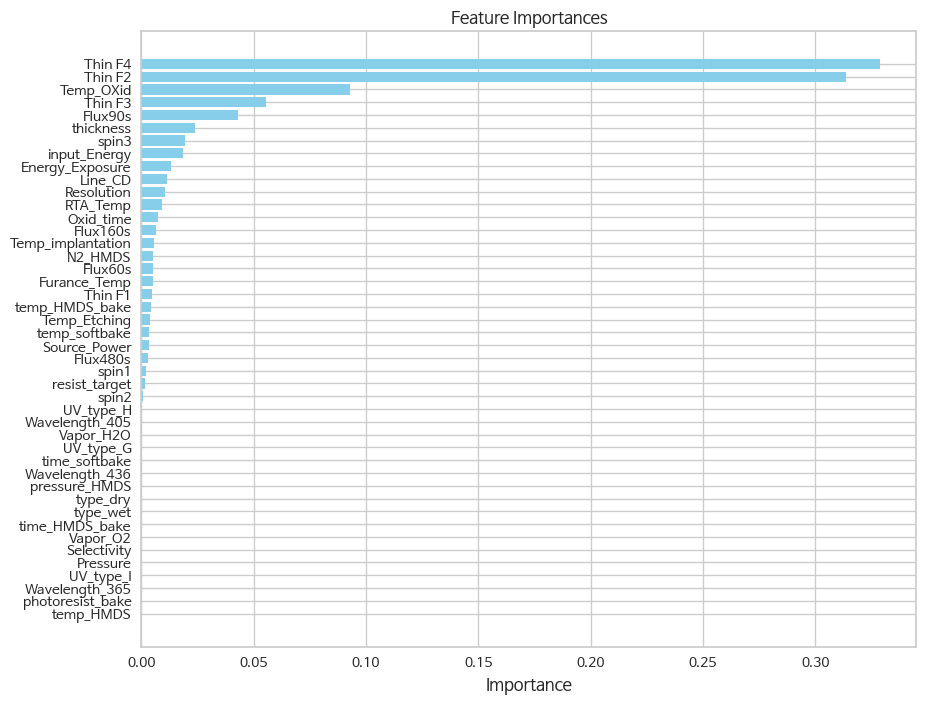

In [26]:
# Gradient Boosting 회귀 모델 정의 및 학습
gbm_model = GradientBoostingRegressor(random_state=1234, max_depth = 3, min_samples_split = 100, \
                                       n_estimators=200)
gbm_model.fit(X_train, y_train)

# 예측
y_pred = gbm_model.predict(X_test)

# 평가
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R-squared Score:", r2)

# 피처 중요도 추출
feature_importances = gbm_model.feature_importances_

# 피처 이름
feature_names = X_train.columns

# 중요도와 피처 이름을 데이터프레임으로 변환
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
})

# 중요도 기준으로 정렬
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# 피처 중요도 출력
print("\nFeature Importances:\n", importance_df)

# 피처 중요도 시각화
plt.figure(figsize=(10, 8))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.title('Feature Importances')
plt.gca().invert_yaxis()
plt.show()

XGBoost Mean Squared Error: 341.81950240727804
XGBoost Mean Absolute Error: 13.163670216684402
XGBoost R-squared Score: 0.9209835487621093

Feature Importances:
               Feature  Importance
19            Thin F4    0.263246
21            Thin F2    0.194656
20            Thin F3    0.063068
0           Temp_OXid    0.062609
27            Flux90s    0.043568
3           thickness    0.039117
12              spin3    0.036826
28           Flux160s    0.024277
30       input_Energy    0.022733
16            Line_CD    0.019902
17         Resolution    0.018898
18    Energy_Exposure    0.018723
32       Furance_Temp    0.014972
2           Oxid_time    0.014790
24       Source_Power    0.014663
5             N2_HMDS    0.013939
33           RTA_Temp    0.013752
31  Temp_implantation    0.013118
8      temp_HMDS_bake    0.012827
26            Flux60s    0.012458
29           Flux480s    0.011180
22            Thin F1    0.010604
10              spin1    0.009723
23       Temp_Etching 

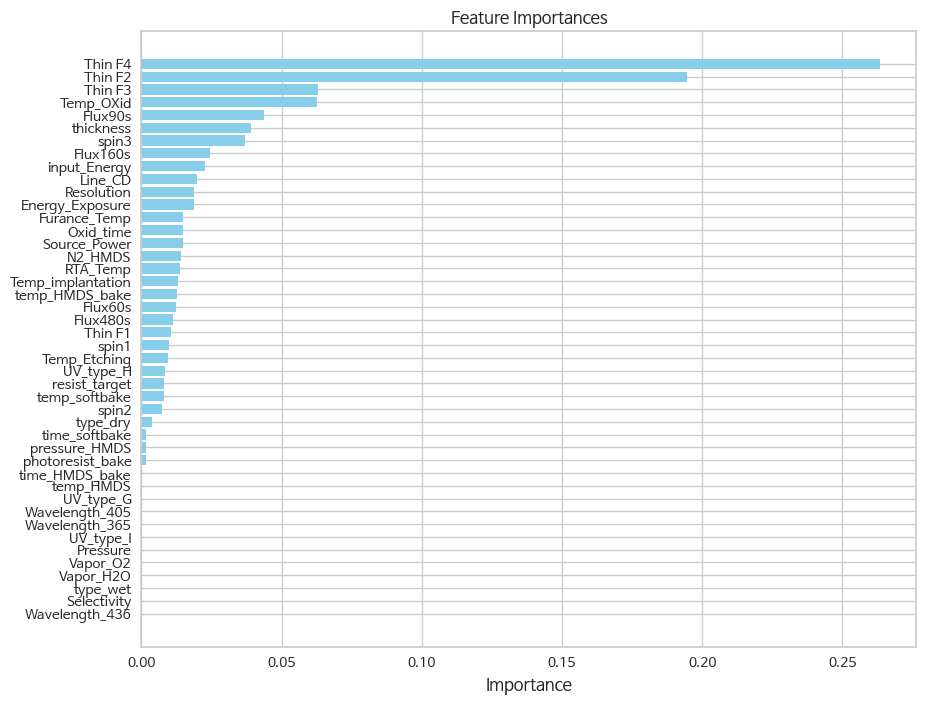

In [27]:
# XGBoost 회귀 모델 정의 및 학습
xgb_model = xgb.XGBRegressor(random_state=1234, max_depth = 3, n_estimators=100)
xgb_model.fit(X_train, y_train)

# 예측
y_pred_xgb = xgb_model.predict(X_test)

# 평가
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

print("XGBoost Mean Squared Error:", mse_xgb)
print("XGBoost Mean Absolute Error:", mae_xgb)
print("XGBoost R-squared Score:", r2_xgb)

# 피처 중요도 추출
feature_importances = xgb_model.feature_importances_

# 피처 이름
feature_names = X_train.columns

# 중요도와 피처 이름을 데이터프레임으로 변환
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
})

# 중요도 기준으로 정렬
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# 피처 중요도 출력
print("\nFeature Importances:\n", importance_df)

# 피처 중요도 시각화
plt.figure(figsize=(10, 8))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.title('Feature Importances')
plt.gca().invert_yaxis()
plt.show()

LightGBM Mean Squared Error: 436.3682350784768
LightGBM Mean Absolute Error: 14.384436931264272
LightGBM R-squared Score: 0.8991272612416373

Feature Importances:
               Feature  Importance
21            Thin F2         130
19            Thin F4         129
0           Temp_OXid         101
3           thickness          83
20            Thin F3          79
30       input_Energy          61
17         Resolution          57
16            Line_CD          51
12              spin3          48
32       Furance_Temp          45
5             N2_HMDS          40
27            Flux90s          40
18    Energy_Exposure          37
22            Thin F1          37
2           Oxid_time          36
31  Temp_implantation          35
23       Temp_Etching          33
28           Flux160s          33
8      temp_HMDS_bake          32
14      temp_softbake          27
26            Flux60s          25
33           RTA_Temp          25
4       resist_target          24
11              spin

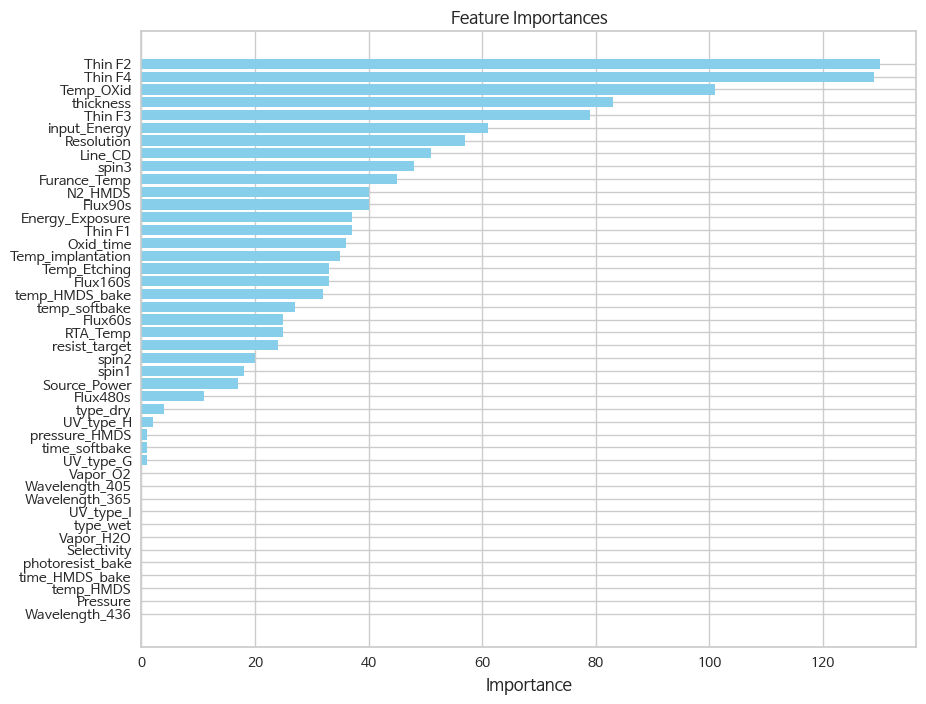

In [28]:
# 데이터 타입을 float으로 변환 (필요시)
if not pd.api.types.is_numeric_dtype(y_train):
    y_train = y_train.astype(float)

if not pd.api.types.is_numeric_dtype(y_test):
    y_test = y_test.astype(float)

# LightGBM 회귀 모델 정의 및 학습
lgb_model = lgb.LGBMRegressor(random_state=1234, n_estimators=100, max_depth=4)
lgb_model.fit(X_train, y_train)

# 예측
y_pred_lgb = lgb_model.predict(X_test)

# 평가
mse_lgb = mean_squared_error(y_test, y_pred_lgb)
mae_lgb = mean_absolute_error(y_test, y_pred_lgb)
r2_lgb = r2_score(y_test, y_pred_lgb)

print("LightGBM Mean Squared Error:", mse_lgb)
print("LightGBM Mean Absolute Error:", mae_lgb)
print("LightGBM R-squared Score:", r2_lgb)

# 피처 중요도 추출
feature_importances = lgb_model.feature_importances_

# 피처 이름
feature_names = X_train.columns

# 중요도와 피처 이름을 데이터프레임으로 변환
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
})

# 중요도 기준으로 정렬
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# 피처 중요도 출력
print("\nFeature Importances:\n", importance_df)

# 피처 중요도 시각화
plt.figure(figsize=(10, 8))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.title('Feature Importances')
plt.gca().invert_yaxis()
plt.show()

In [29]:
# df_merged.columns
# df_merged['Temp_OXid'] = 1120
# df_merged['N2_HMDS'] = 15.7
# df_merged['RTA_Temp'] = 154
# df_merged['Flux90s'] = 100000000000000000
# df_merged['Flux480s'] = 300000000000000000
# df_merged['input_Energy'] = 31900
# df_merged['Temp_Etching'] = 67.91

In [30]:
df_merged['Temp_OXid'] = np.random.uniform(low=1120, high=1348.62, size=len(df_merged))
df_merged['N2_HMDS'] = np.random.uniform(low=9.28, high=15.7, size=len(df_merged))
df_merged['RTA_Temp'] = np.random.uniform(low=37, high=50, size=len(df_merged))
df_merged['Flux90s'] = np.random.uniform(low=3840000000, high=100000000000000000, size=len(df_merged))
df_merged['Flux480s'] = np.random.uniform(low=1000000000000000, high=300000000000000000, size=len(df_merged))
df_merged['input_Energy'] = np.random.uniform(low=29604, high=31900, size=len(df_merged))
df_merged['Temp_Etching'] = np.random.uniform(low=67.91, high=71, size=len(df_merged))

# 데이터프레임 정의
df_char = df_merged.select_dtypes(include="object")
df_numeric = df_merged.select_dtypes(exclude="object")

# 타겟 변수와 설명 변수 정의
df_y = df_numeric['Target']
df_x = df_numeric.drop(columns=['Target'])

# 범주형 데이터 원-핫 인코딩
df_encoded = pd.get_dummies(df_char)

# 최종 데이터프레임 생성
df_x = df_x.join(df_encoded)

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.3, random_state=1234)

In [31]:
df_merged

,type,Temp_OXid,Vapor,Pressure,Oxid_time,thickness,resist_target,N2_HMDS,pressure_HMDS,temp_HMDS,...,Selectivity,Flux60s,Flux90s,Flux160s,Flux480s,input_Energy,Temp_implantation,Furance_Temp,RTA_Temp,Target
0,dry,1128.605261,O2,0.30,120.0,712.98,1.426,14.995731,15.112,19.893,...,1.188,1.500000e+16,6.532693e+16,6.470000e+17,2.257996e+16,29977.757747,103.513,854.0,47.936939,141
1,dry,1285.282946,O2,0.14,137.0,714.41,0.730,10.442826,15.083,20.035,...,0.847,1.110000e+16,1.878797e+16,1.040000e+18,1.173114e+17,30245.776996,105.628,895.0,38.298483,55
2,dry,1322.299429,O2,0.25,116.0,710.27,0.903,12.897574,14.917,19.884,...,1.152,1.040000e+16,4.242971e+16,6.470000e+17,2.020458e+16,31799.082799,102.716,898.0,40.139274,96
3,dry,1145.732205,O2,0.29,143.0,710.62,0.510,9.692016,14.886,20.023,...,1.063,8.890000e+15,1.540989e+16,3.410000e+17,5.030070e+16,30113.671040,102.902,879.0,40.672892,105
4,wet,1140.648810,H2O,0.20,76.0,711.70,1.696,13.731547,14.705,20.000,...,1.120,1.670000e+16,6.787145e+16,7.260000e+17,8.416507e+16,31885.961143,101.465,882.0,41.747002,79
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15385,dry,1222.807196,O2,0.13,50.0,711.92,1.154,11.081907,15.079,19.997,...,1.060,1.660000e+16,7.972185e+16,1.030000e+18,9.075624e+16,30890.089069,101.566,914.0,38.204400,134
15386,wet,1223.721881,H2O,0.18,112.0,696.98,0.876,11.346444,14.991,20.029,...,1.106,1.150000e+16,4.247210e+16,7.630000e+17,2.063155e+17,30177.687829,102.856,899.0,44.467129,129
15387,wet,1308.514661,H2O,0.08,78.0,706.11,0.485,12.349217,14.855,19.986,...,1.209,9.270000e+15,6.615637e+15,4.790000e+17,2.390555e+17,31457.737616,102.541,903.0,38.726252,78
15388,dry,1260.851805,O2,0.38,80.0,707.33,1.672,12.120405,14.876,19.785,...,0.849,1.880000e+16,4.810129e+16,7.910000e+17,2.805749e+17,31422.364156,104.359,879.0,45.507103,60


In [32]:
X_test

,Temp_OXid,Pressure,Oxid_time,thickness,resist_target,N2_HMDS,pressure_HMDS,temp_HMDS,temp_HMDS_bake,time_HMDS_bake,...,type_dry,type_wet,Vapor_H2O,Vapor_O2,UV_type_G,UV_type_H,UV_type_I,Wavelength_365,Wavelength_405,Wavelength_436
12225,1187.196544,0.12,195.0,688.38,0.901,14.723434,14.874,19.956,205.120,90.082,...,1,0,0,1,1,0,0,0,0,1
13616,1290.892788,0.10,45.0,712.24,1.454,10.175299,14.896,19.754,199.397,90.031,...,1,0,0,1,0,0,1,1,0,0
11189,1191.104360,0.30,230.0,719.90,0.996,10.746405,15.246,20.024,199.012,90.002,...,1,0,0,1,0,1,0,0,1,0
2369,1198.077846,0.21,68.0,693.57,0.871,10.900911,14.916,20.089,204.315,89.927,...,0,1,1,0,0,0,1,1,0,0
8327,1196.601935,0.14,19.0,714.99,0.497,11.748793,15.041,20.047,203.461,89.956,...,0,1,1,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3365,1329.962027,0.10,22.0,716.37,1.910,11.002616,15.068,20.022,203.769,90.055,...,0,1,1,0,0,0,1,1,0,0
3930,1292.205742,0.25,220.0,710.01,0.984,13.495164,14.839,20.014,203.617,90.102,...,1,0,0,1,1,0,0,0,0,1
4617,1145.719191,0.27,120.0,719.89,1.266,15.595625,15.026,19.889,199.083,89.984,...,1,0,0,1,0,1,0,0,1,0
2154,1319.248545,0.40,157.0,719.68,0.619,15.300093,15.001,19.972,202.556,89.980,...,0,1,1,0,0,1,0,0,1,0


In [33]:
y_pred2 = rf_model.predict(X_test)

# 평가
mse = mean_squared_error(y_test, y_pred2)
mae = mean_absolute_error(y_test, y_pred2)
r2 = r2_score(y_test, y_pred2)

print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R^2 Score:", r2)

Mean Squared Error: 1446.8333352465406
Mean Absolute Error: 25.09590682269859
R^2 Score: 0.6655438473266326


In [34]:
y_pred1

array([ 41.91042687, 196.08573217, 119.75733884, ..., 249.1247399 ,
        93.47282787, 170.32260165])

In [35]:
# 예측 값의 총합
sum_predictions = np.sum(y_pred1)

# 예측 값의 개수
count_predictions = len(y_pred1)  # 또는 np.size(y_pred1)

# 계산된 평균 불량률
average_defect_rate = sum_predictions / (2000 * count_predictions)
average_defect_rate * 100

5.162342813266415

In [36]:
# 예측 값의 총합
sum_predictions = np.sum(y_pred2)

# 예측 값의 개수
count_predictions = len(y_pred2)  # 또는 np.size(y_pred1)

# 계산된 평균 불량률
average_defect_rate = sum_predictions / (2000 * count_predictions)
average_defect_rate * 100

5.163457810475873

In [37]:
# 예측 결과를 DataFrame으로 변환
y_pred1_df = pd.DataFrame(y_pred1, columns=['Predicted1'])
y_pred2_df = pd.DataFrame(y_pred2, columns=['Predicted2'])

# X_test가 numpy 배열인 경우
if isinstance(X_test, np.ndarray):
    X_test_df = pd.DataFrame(X_test)
else:
    X_test_df = X_test.copy()

# y_test가 numpy 배열인 경우
if isinstance(y_test, np.ndarray):
    y_test_series = pd.Series(y_test, name='Actual')
else:
    y_test_series = y_test.copy()

# X_test와 y_pred를 concat
result_df = pd.concat([X_test_df.reset_index(drop=True), y_pred1_df.reset_index(drop=True)], axis=1)

# 예측 결과와 실제 값을 결합
result_df = pd.concat([result_df.reset_index(drop=True), y_pred2_df.reset_index(drop=True)], axis=1)

print(result_df.head())

result_df.to_csv('최적운전2.csv', index=False)

     Temp_OXid  Pressure  Oxid_time  thickness  resist_target    N2_HMDS  \
0  1187.196544      0.12      195.0     688.38          0.901  14.723434   
1  1290.892788      0.10       45.0     712.24          1.454  10.175299   
2  1191.104360      0.30      230.0     719.90          0.996  10.746405   
3  1198.077846      0.21       68.0     693.57          0.871  10.900911   
4  1196.601935      0.14       19.0     714.99          0.497  11.748793   

   pressure_HMDS  temp_HMDS  temp_HMDS_bake  time_HMDS_bake  ...  Vapor_H2O  \
0         14.874     19.956         205.120          90.082  ...          0   
1         14.896     19.754         199.397          90.031  ...          0   
2         15.246     20.024         199.012          90.002  ...          0   
3         14.916     20.089         204.315          89.927  ...          1   
4         15.041     20.047         203.461          89.956  ...          1   

   Vapor_O2  UV_type_G  UV_type_H  UV_type_I  Wavelength_365  Wavele